In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print('Customers Dataset:')
print(customers.head())
print(customers.info())

print('\nProducts Dataset:')
print(products.head())
print(products.info())

print('\nTransactions Dataset:')
print(transactions.head())
print(transactions.info())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving 

In [4]:
# Check for Missing Values
print('\nMissing Values:')
print('Customers:', customers.isnull().sum())
print('Products:', products.isnull().sum())
print('Transactions:', transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Descriptive Statistics
print('\nDescriptive Statistics:')
print('Customers:', customers.describe())
print('Products:', products.describe())
print('Transactions:', transactions.describe())



Descriptive Statistics:
Customers:        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products:             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
Transactions:           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [6]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
print('\nMerged Dataset:')
print(merged_data.head())


Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving 

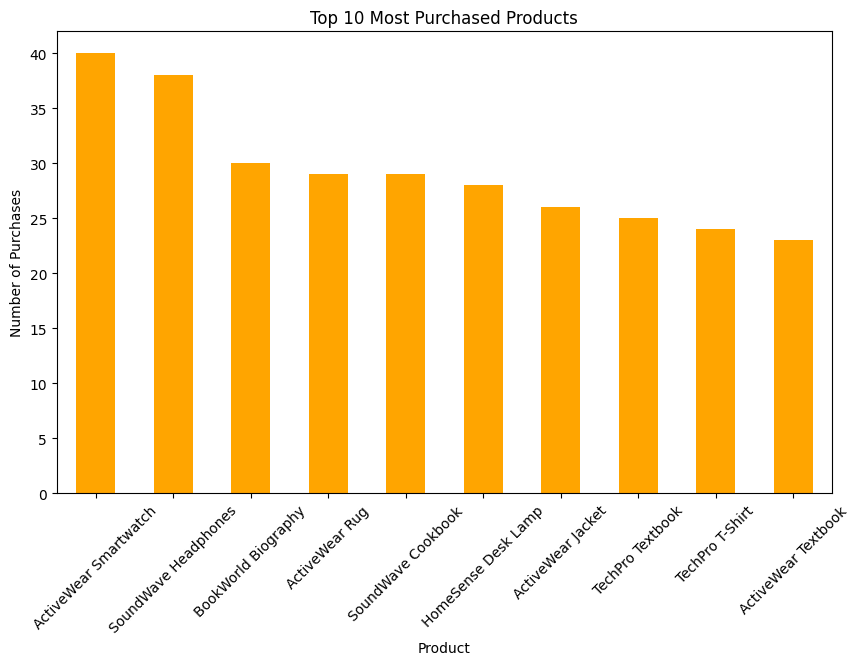

In [8]:
# 1. Top 10 Most Purchased Products
top_products = merged_data['ProductName'].value_counts().head(10)
top_products.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


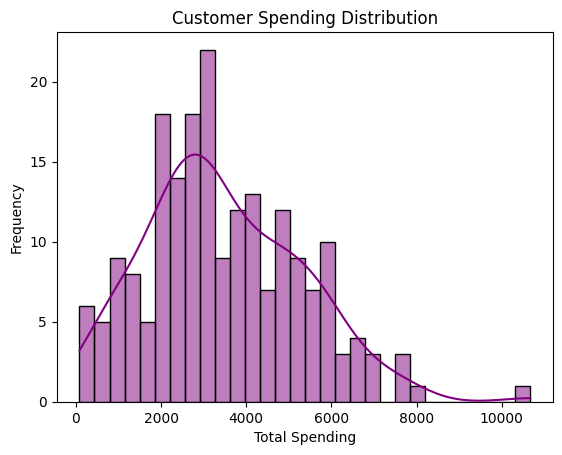

In [20]:
# 2. Customer Segmentation Based on Spending
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum()
sns.histplot(customer_spending, bins=30, kde=True, color='purple')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()


In [19]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


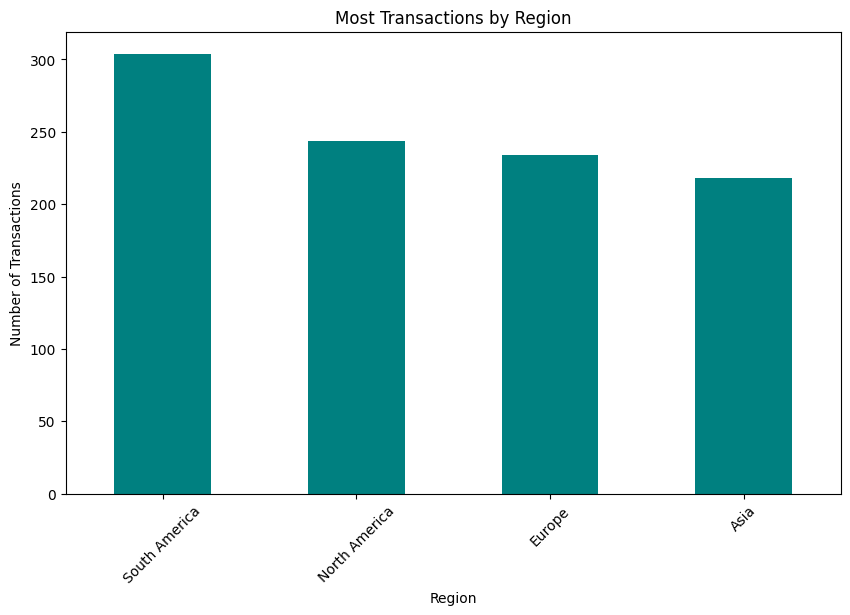

In [21]:
# 3. Most Transactions by Region
if 'Region' in customers.columns:
    region_transactions = merged_data.groupby('Region')['TransactionID'].count().sort_values(ascending=False)
    region_transactions.plot(kind='bar', color='teal', figsize=(10, 6))
    plt.title('Most Transactions by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Region column not found in customers dataset.")

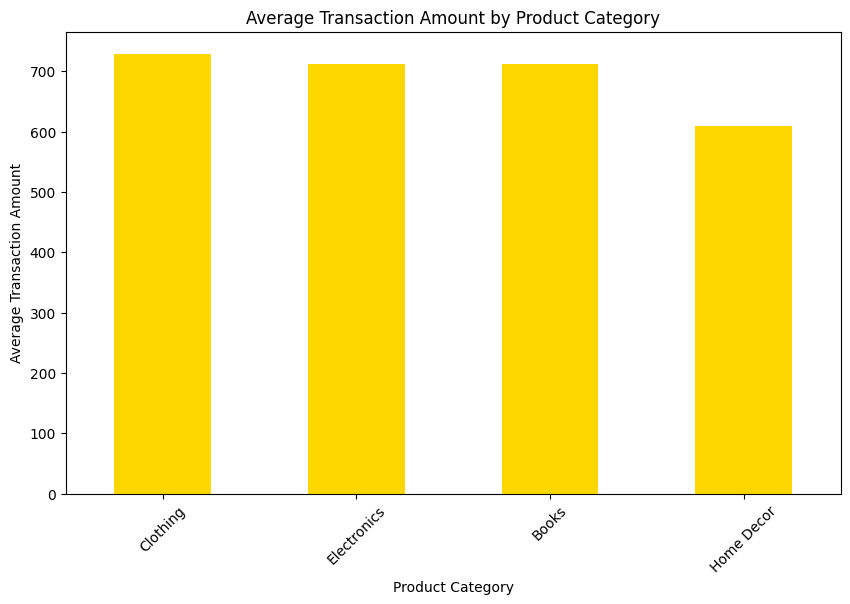

In [24]:
# 4. Average Transaction Amount by Product Category
if 'Category' in products.columns:
    category_revenue = merged_data.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
    category_revenue.plot(kind='bar', color='gold', figsize=(10, 6))
    plt.title('Average Transaction Amount by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Average Transaction Amount')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Category column not found in products dataset.")

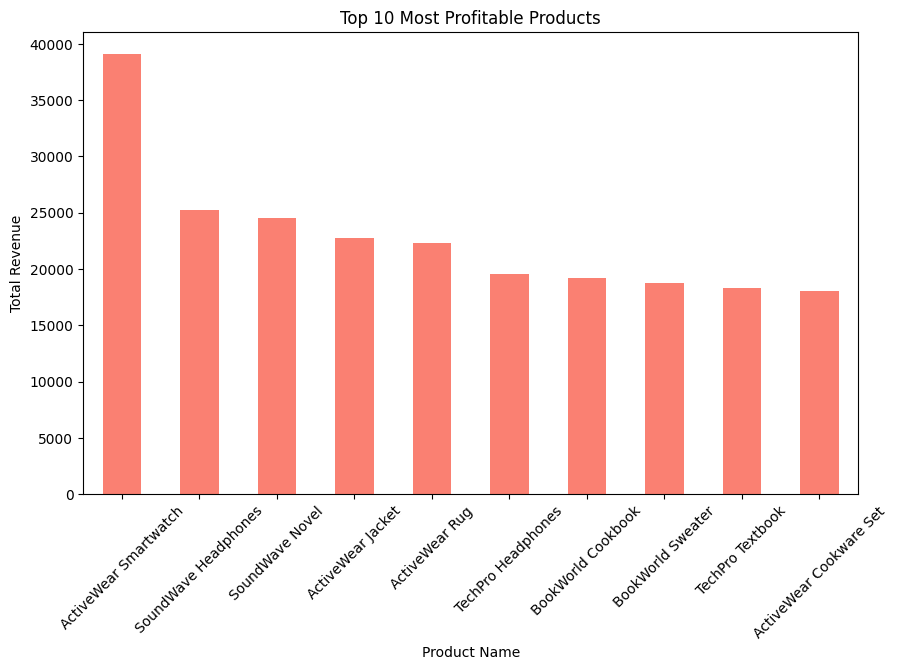

In [26]:
# 5. Most Profitable Products
top_profitable_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_profitable_products.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

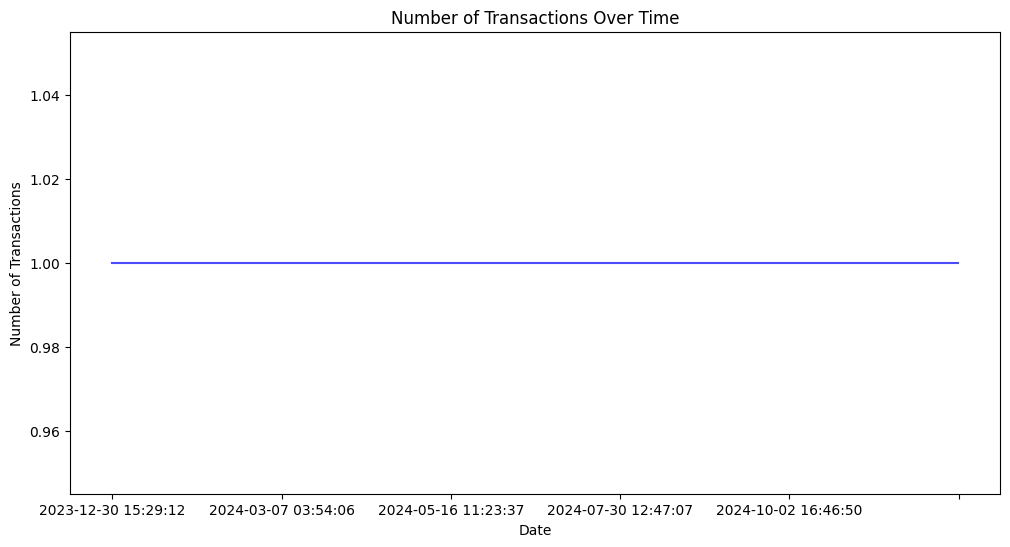

In [27]:
# 6. Transactions Over Time
if 'TransactionDate' in merged_data.columns:
    daily_transactions = merged_data.groupby('TransactionDate')['TransactionID'].count()
    daily_transactions.plot(kind='line', figsize=(12, 6), color='blue', alpha=0.7)
    plt.title('Number of Transactions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.show()
else:
    print("TransactionDate column not found in merged dataset.")


In [28]:
# Save Cleaned Dataset
merged_data.to_csv('Merged_Dataset.csv', index=False)